In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
switch = {
    0 : 1,
    1 : 0
}
data['finished'] = data.unfinished.map(switch)
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


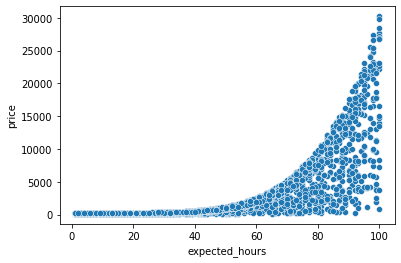

In [3]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', data=data)

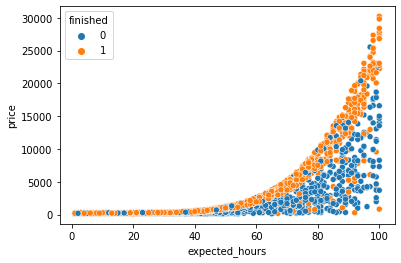

In [4]:
sns.scatterplot(x='expected_hours', y='price', hue='finished', data=data)

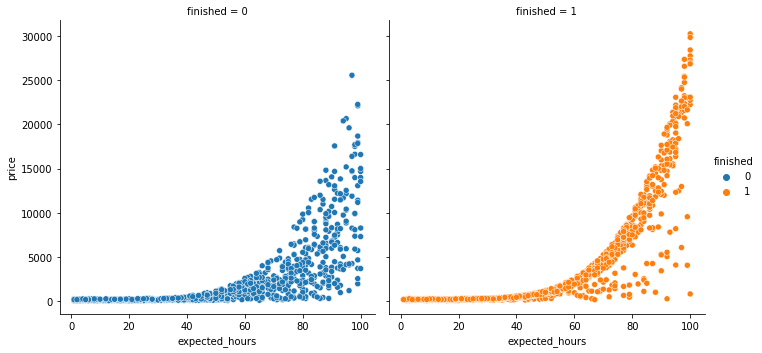

In [5]:
sns.relplot(x='expected_hours', y='price', hue='finished', col='finished', data=data)

In [6]:
X = data[['expected_hours', 'price']]
y = data['finished']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 20
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify= y)
print(f'Training with {len(X_train)} and testing with {len(X_test)} elements')

model = LinearSVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions) * 100
print(f'Accuracy was {accuracy:.2f}')

Training with 1617 and testing with 540 elements
Accuracy was 51.48


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [8]:
base_predictions = np.ones(540)
accuracy = accuracy_score(y_test, base_predictions) * 100
print(f'The baseline algorithm accuracy was {accuracy:.2f}')

The baseline algorithm accuracy was 52.59


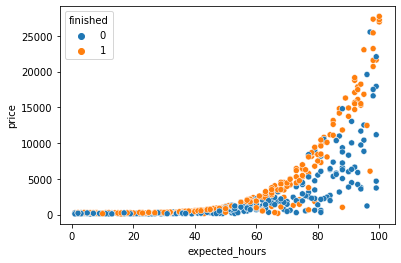

In [9]:
sns.scatterplot(x='expected_hours', y='price', hue=y_test, data=X_test)

In [10]:
x_min = X_test.expected_hours.min()
x_max = X_test.expected_hours.max()
y_min = X_test.price.min()
y_max = X_test.price.max()
print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [11]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [12]:
xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

In [13]:
z = model.predict(points)
z = z.reshape(xx.shape)
z

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

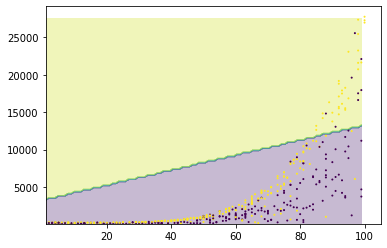

In [14]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(X_test.expected_hours, X_test.price, c=y_test, s=1)

# DECISION BOUNDARY

Training with 1617 and testing with 540 elements
Accuracy was 58.89


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


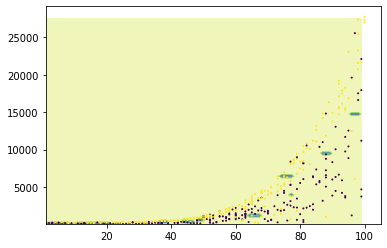

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 20
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify= y)
print(f'Training with {len(X_train)} and testing with {len(X_test)} elements')

model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions) * 100
print(f'Accuracy was {accuracy:.2f}')

x_min = X_test.expected_hours.min()
x_max = X_test.expected_hours.max()
y_min = X_test.price.min()
y_max = X_test.price.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(X_test.expected_hours, X_test.price, c=y_test, s=1)

# DECISION BOUNDARY

Training with 1617 and testing with 540 elements
Accuracy was 70.37


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


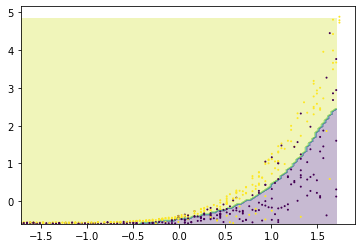

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 20
np.random.seed(SEED)

raw_X_train, raw_X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify= y)
print(f'Training with {len(X_train)} and testing with {len(X_test)} elements')

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions) * 100
print(f'Accuracy was {accuracy:.2f}')

data_x = X_test[:,0]
data_y = X_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)

# DECISION BOUNDARY